In [148]:
import pandas as pd 
import time
import numpy as np
df = pd.read_json('ultimate_data_challenge.json') 

In [149]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [151]:
#fill in missing ratings
df=df.fillna(df.mean())

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [153]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [154]:
#dropping rows without phones
df = df.dropna()


In [155]:
df['city'].unique()


array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [156]:
#converting to 1/0 values for cities since few values 
df = pd.get_dummies(df, columns=['city','phone'], drop_first=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49604 non-null  int64  
 1   signup_date             49604 non-null  object 
 2   avg_rating_of_driver    49604 non-null  float64
 3   avg_surge               49604 non-null  float64
 4   last_trip_date          49604 non-null  object 
 5   surge_pct               49604 non-null  float64
 6   ultimate_black_user     49604 non-null  bool   
 7   weekday_pct             49604 non-null  float64
 8   avg_dist                49604 non-null  float64
 9   avg_rating_by_driver    49604 non-null  float64
 10  city_King's Landing     49604 non-null  uint8  
 11  city_Winterfell         49604 non-null  uint8  
 12  phone_iPhone            49604 non-null  uint8  
dtypes: bool(1), float64(6), int64(1), object(2), uint8(3)
memory usage: 4.0+ MB


In [158]:
#get the latest trip date to infer date of data pull
df.max()

trips_in_first_30_days           125
signup_date               2014-01-31
avg_rating_of_driver            5.00
avg_surge                       8.00
last_trip_date            2014-07-01
surge_pct                     100.00
ultimate_black_user             True
weekday_pct                   100.00
avg_dist                      160.96
avg_rating_by_driver            5.00
city_King's Landing                1
city_Winterfell                    1
phone_iPhone                       1
dtype: object

In [159]:
#calc time since last purchase
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['pulldate'] = '2014-07-01'
df['pulldate'] = pd.to_datetime(df['pulldate'])

In [160]:
df['days_since'] = df['pulldate'] - df['last_trip_date']

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   trips_in_first_30_days  49604 non-null  int64          
 1   signup_date             49604 non-null  object         
 2   avg_rating_of_driver    49604 non-null  float64        
 3   avg_surge               49604 non-null  float64        
 4   last_trip_date          49604 non-null  datetime64[ns] 
 5   surge_pct               49604 non-null  float64        
 6   ultimate_black_user     49604 non-null  bool           
 7   weekday_pct             49604 non-null  float64        
 8   avg_dist                49604 non-null  float64        
 9   avg_rating_by_driver    49604 non-null  float64        
 10  city_King's Landing     49604 non-null  uint8          
 11  city_Winterfell         49604 non-null  uint8          
 12  phone_iPhone            49604 no

In [162]:
#calc retained and convert true/false
df['retained'] = np.where(df.days_since < '30 days',1,0)
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)


In [163]:
df


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,pulldate,days_since,retained
0,4,2014-01-25,4.700000,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,2014-07-01,14 days,1
1,0,2014-01-29,5.000000,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,0,0,2014-07-01,57 days,0
2,3,2014-01-06,4.300000,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,1,2014-07-01,175 days,0
3,9,2014-01-10,4.600000,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,2014-07-01,2 days,1
4,14,2014-01-27,4.400000,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,1,0,2014-07-01,108 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.000000,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,1,0,1,2014-07-01,26 days,1
49996,1,2014-01-24,4.601559,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,0,1,2014-07-01,157 days,0
49997,0,2014-01-31,5.000000,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,0,1,0,2014-07-01,40 days,0
49998,2,2014-01-14,3.000000,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,0,1,2014-07-01,167 days,0


<AxesSubplot:>

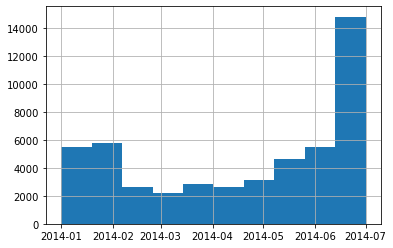

In [174]:
df['last_trip_date'].hist()

In [176]:
#confirm Jan signups
df['signup_date'].max()

'2014-01-31'

In [180]:
df['retained'].value_counts()

0    31424
1    18180
Name: retained, dtype: int64

In [181]:
#calculate percentage of retained customers (37%)
df['retained'].value_counts(normalize=True) * 100

0    63.34973
1    36.65027
Name: retained, dtype: float64

In [164]:

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [165]:
X = df.drop(['signup_date','last_trip_date','pulldate','days_since','retained'],axis=1)


In [166]:
Y = df['retained']

In [167]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [168]:
#Using XGBoost as data has a mix of numerical and categorical features, we have a good sized sample, and we need
# to be able to evaluate the result easily




model = XGBClassifier()
model.fit(X_train, y_train.values.ravel()) 

[20:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
pred = model.predict(X_test)

In [170]:
#Prediction Accuracy is good at 78%, with an AUC Score of 76%



print("Accuracy for XGB Classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for XGB Classifier on CV data:  0.7871105681124008


In [171]:
print ('ROC AUC Score',roc_auc_score(y_test,pred))

ROC AUC Score 0.759822298033186


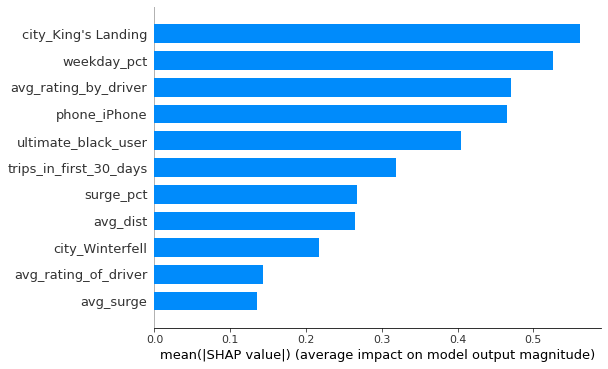

In [172]:
#Order of feature importance below


import shap

shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

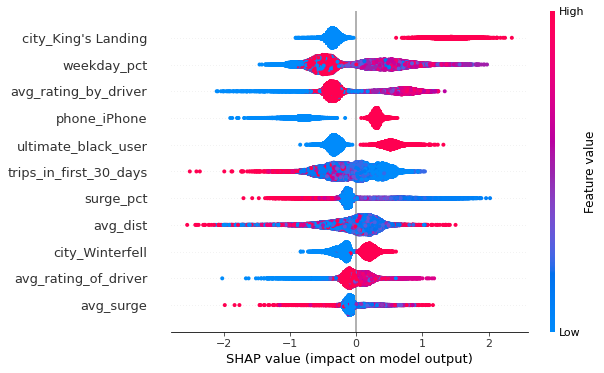

In [182]:
shap.summary_plot(shap_values, X_train)